### Importing python library


In [2]:
# the following packages are used for data preprocessing 

import numpy as np
import pandas as pd

In [3]:
# Loading the data into python

data = pd.read_excel('D:/task/mavoix_ml_sample_dataset.xlsx')
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [4]:
# total dimension of the data 

data.shape

(392, 24)

In [5]:
# thotal datatypes of the columns that are available in the dataset

data.get_dtype_counts()

C:\Users\MANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  This is separate from the ipykernel package so we can avoid doing imports until


float64     1
int64      14
object      9
dtype: int64

In [6]:
# checking null and missing values percentage of the whole dataset

((data.isnull().sum()|data.isna().sum())/data.shape[0])*100

Application_ID                  0.000000
Current City                    0.000000
Python (out of 3)               0.000000
R Programming (out of 3)        0.000000
Deep Learning (out of 3)        0.000000
PHP (out of 3)                  0.000000
MySQL (out of 3)                0.000000
HTML (out of 3)                 0.000000
CSS (out of 3)                  0.000000
JavaScript (out of 3)           0.000000
Unnamed: 10                   100.000000
AJAX (out of 3)                 0.000000
Bootstrap (out of 3)            0.000000
MongoDB (out of 3)              0.000000
Node.js (out of 3)              0.000000
ReactJS (out of 3)              0.000000
Other skills                    3.571429
Degree                          3.061224
Stream                          4.591837
Current Year Of Graduation      0.000000
Performance_PG                 73.724490
Performance_UG                 13.775510
Performance_12                 41.581633
Performance_10                 45.153061
dtype: float64

In [7]:
# droping unnecessary columns

data.drop(columns='Unnamed: 10',inplace = True)

The following columns are not needed for this , my primary objective depends on the skills of the student data 

In [8]:
data2=data.drop(columns=['Performance_10','Performance_12','Performance_UG','Performance_PG'])

The most occuring values of the following columns

In [9]:
data2.loc[:,['Stream','Degree','Other skills']].mode()

,Stream,Degree,Other skills
0,Computer Science,Bachelor of Technology (B.Tech),"Android, Java"
1,NaN,NaN,"Data Analytics, Machine Learning, Python"
2,NaN,NaN,"MS-Word, C Programming, CSS, Embedded Systems,..."


The other skill columns is very random and the values are very repetative which can be clean by NLTK library. 
The primary columns are the skills which is needed are mentioned. So for modeling purpose we will be taking the skills that are rated from '0' to '3'

In [10]:
# filling the null values of the following columns and droping the columns

data2.Stream.fillna(value='Computer Science',inplace = True)
data2.Degree.fillna(value='Bachelor of Technology (B.Tech)',inplace = True)
data2.drop(columns=['Other skills','Application_ID'], inplace = True)

In [11]:
data2.describe()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Current Year Of Graduation
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.375000,0.566327,0.461735,0.612245,0.403061,1.346939,1.045918,0.770408,0.015306,0.265306,0.035714,0.086735,0.178571,2018.867347
std,0.975237,0.905052,0.842336,0.911789,0.837602,1.071386,1.022976,0.966626,0.122924,0.715928,0.255377,0.401567,0.499360,2.280296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.750000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
75%,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000,2023.000000


In [12]:
# selecting the object type column names from the dataset

obj_col=data2.select_dtypes(include = [object]).columns

In [13]:
# First five value coumnts of object data

for i in obj_col:
    print(i)
    print('--------------')
    print(data2[i].value_counts()[:5])
    print()

Current City
--------------
Bangalore    214
Hyderabad     22
Banglore      14
Chennai       12
Pune          10
Name: Current City, dtype: int64

Degree
--------------
Bachelor of Technology (B.Tech)          122
Bachelor of Engineering (B.E)             84
Master of Computer Applications (MCA)     70
B.Tech (Hons.)                            25
Master of Technology (M.Tech)             19
Name: Degree, dtype: int64

Stream
--------------
Computer  Science                 64
Electronics and Communication     46
Computer Science & Engineering    45
Computer Application              35
Information Technology            20
Name: Stream, dtype: int64



now converting the object data types into integer for modeling and analysis

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# Label encodeing the columns

enc = LabelEncoder()
for i in obj_col:
    data2[i] = enc.fit_transform(data2[i])

There is no columns for the candidates which are in data science background and web developer backdround and for that a rating column

In [16]:
# createing data science column

data2['Data_science'] = ((data2['Python (out of 3)'] + 
                           data2['R Programming (out of 3)'] + 
                          data2['Deep Learning (out of 3)'])/9)
data2.Data_science = round(data2.Data_science, 2)

In [17]:
# createing web developer column

data2['Web_developer'] = round(((data2['PHP (out of 3)'] + 
                           data2['MySQL (out of 3)'] +
                          data2['HTML (out of 3)'] + 
                           data2['CSS (out of 3)'] + 
                           data2['JavaScript (out of 3)']+
                          data2['AJAX (out of 3)'] + 
                           data2['Bootstrap (out of 3)'] +
                          data2['MongoDB (out of 3)'] + 
                           data2 ['Node.js (out of 3)'] + 
                          data2['ReactJS (out of 3)'])/30),2)

In [18]:
# total rating column of each student

data2['total_rating'] = round(((data2['Python (out of 3)'] + 
                          data2['R Programming (out of 3)'] + 
                           data2['Deep Learning (out of 3)'] +
                          data2['PHP (out of 3)'] + 
                           data2['MySQL (out of 3)'] +
                          data2['HTML (out of 3)'] + 
                           data2['CSS (out of 3)'] + 
                          data2['JavaScript (out of 3)'] +
                           data2['AJAX (out of 3)'] + 
                          data2['Bootstrap (out of 3)'] +
                           data2['MongoDB (out of 3)'] + 
                          data2 ['Node.js (out of 3)'] + 
                           data2['ReactJS (out of 3)'])/(13*3)),2)

In [19]:
data2.head()

,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Degree,Stream,Current Year Of Graduation,Data_science,Web_developer,total_rating
0,4,0,2,0,2,0,2,3,2,0,2,0,0,0,11,63,2017,0.22,0.37,0.33
1,4,2,0,0,2,2,2,2,2,0,0,0,0,0,12,23,2019,0.22,0.33,0.31
2,4,3,0,1,2,2,2,0,2,0,0,0,0,0,22,17,2018,0.44,0.27,0.31
3,4,2,0,2,1,0,2,0,0,0,0,0,0,0,9,43,2019,0.44,0.10,0.18
4,4,2,0,0,2,0,2,1,1,0,0,2,2,2,12,68,2018,0.22,0.40,0.36


In [20]:
# ploting correlation matrix of the data set

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

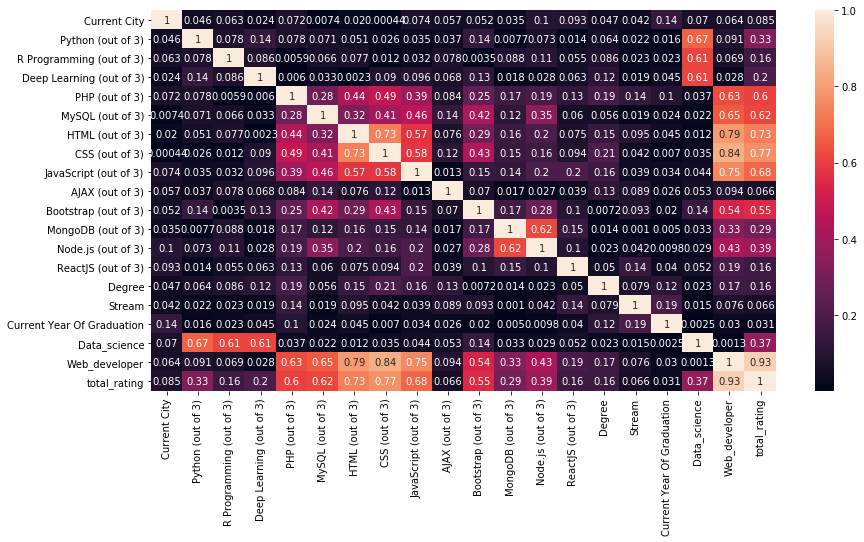

In [21]:
plt.figure(figsize=(14,7))
sns.heatmap(abs(data2.corr()),annot=True)

Modeling the data 

We will use regression model for prediction and the target variable as ' total_rating ' column 

In [22]:
# importing packages for modeling the data

from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

Selecting features as 'X' and Traget variable as 'y'

In [23]:
X = data2.drop(columns=['Data_science','Web_developer'])
y = data2.total_rating

In [24]:
# spliting the data for traing and testing for the model as 80 / 20 ratio 

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 5, test_size = 0.2)

Model support vector regressor

In [25]:
# model testing on support vector regressor

model = LinearSVR(random_state=2)
model.fit(X_train,y_train)

C:\Users\MANGA\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=2, tol=0.0001, verbose=0)

In [26]:
y_pred = model.predict(X_test)

Accuracy of support vector regressor

In [27]:
r2_score(y_test,y_pred)

-0.156311808625895

Model of Linear regression

In [28]:
model2 = LinearRegression(normalize = True)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

Accuracy of linear regression

In [29]:
r2_score(y_test,y_pred2)

1.0

Model of Random forest 

In [30]:
model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

Accuracy of random forest

In [31]:
r2_score(y_test,y_pred3)

0.9971814467071922

Selecting linear regression as final model and applying cross validation to avoid overfitting

In [32]:
score=cross_val_score(LinearRegression(normalize = True),X,y,cv = 5)
np.mean(score)

1.0

Review of the whole data set and my karnel

1. The data set is very small for analysis.
2. The data set can be improved if the rating parameter is changed from 3 to 5.
3. Adding more columns and user data will improve the model and improve more quality of students such as projects, rank on hackathon , online portfollio.
4. For modeling purpose we need more data for effective modeling

 I will be very glad to hear a feedback on this kernal